In [1]:
import numpy as np
import pandas as pd
import random
import timeit
import matplotlib.pyplot as plt

## Step 1: Building piece by piece

In [2]:
#place a car behind one door represented as '1' and goats behind two represented as '2' then shuffle the doors
doors = [0,0,1]
np.random.shuffle(doors)
doors

[1, 0, 0]

In [3]:
#choose one door
choice = np.asscalar(np.random.choice(3, 1))
choice

2

In [4]:
#open one of the doors with a goat (0) behind it
open_door = [0,1,2]
del open_door[choice]
if doors[choice] == 1:
    #del open_door[choice]
    del open_door[random.randint(0,1)]
else:
    for i in range (0,2):
        if doors[i] == 1:
            del open_door[i]
            #del open_door[random.randint(0,1)]
open_door = open_door[0]
open_door


1

In [5]:
#Strategy 1: Don't change doors
win_rate = 0
if doors[choice] == 1:
    win_rate = (win_rate + 1)
    print('Win')
else: 
    print('Lose')

Lose


In [6]:
#Strategy 2: Change doors
x = 3 - choice - open_door
choice = x
if doors[choice] == 1:
    win_rate = (win_rate + 1)
    print('Win')
else: 
    print('Lose')

Win


## Step 2: Glue pieces together

In [ ]:
def setup():
    n = 10000
    doors = [0,0,1]
    stay_rate = []
    win_rate = 0
    for j in range (1,n):
            #shuffle doors
            #doors = [0,0,1]
        np.random.shuffle(doors) 

            #pick a random door
        choice = np.asscalar(np.random.choice(3, 1))

        #Monty opens a door with a goat behind it   
        open_door = [0,1,2]
        del open_door[choice]
        if doors[choice] == 1:
                #del open_door[choice]                del open_door[random.randint(0,1)]
        else:
            for i in range (0,2):
                if doors[i] == 1:                   
                    del open_door[i]
                        #del open_door[random.randint(0,1)]
         open_door = open_door[0]

            #We stay with our decision
         if doors[choice] == 1:
            win_rate = (win_rate + 1)

        stay_rate.append(win_rate/j)
        print("The win rate for the stay strategy after", n ,"trails is: ", win_rate/j)

In [18]:
#The stay strategy

#initilize variables
n = 1000
doors = [0,0,1]
stay_rate = []
def stay():
    stay_rate.clear()
    win_rate = 0
    for j in range (1,n+1):
        #shuffle doors
        #doors = [0,0,1]
        np.random.shuffle(doors) #shuffle doors

        #pick a random door
        choice = np.asscalar(np.random.choice(3, 1)) #pick a door index between 0-2

    #Monty opens a door with a goat behind it   
        open_door = [0,1,2] #index of all doors
        del open_door[choice] # we delete the index of chosen door
        if doors[choice] == 1: #check if chosen door has a car (1), if it does open open a random door that has a goat(0)
            #del open_door[choice]
            del open_door[random.randint(0,1)] #delete (open) door with goat
        else:
            for i in range (0,2): #if chosen door has a goat(0) find where the car(1) is and open the other door 
                if doors[i] == 1:
                    del open_door[i]
                    #del open_door[random.randint(0,1)]
        open_door = open_door[0]

        #We stay with our decision
        if doors[choice] == 1:
            win_rate = (win_rate + 1)
            
        stay_rate.append(win_rate/j)
    print("The win rate for the stay strategy after", n ,"trails is: ", win_rate/n)
    print(len(stay_rate))

In [51]:
#The switch strategy
n = 1000
doors = [0,0,1]
switch_rate = []
def switch():
    switch_rate.clear()
    win_rate = 0
    for j in range (1,n+1):
        #shuffle doors
        #doors = [0,0,1]
        np.random.shuffle(doors)
        print(doors)

        #pick a random door
        choice = np.asscalar(np.random.choice(3, 1))
        print(choice)

    #Monty opens a door with a goat behind it   
        open_door = [0,1,2]
        del open_door[choice]
    
    
    
        if doors[choice] == 1:
            #del open_door[choice]
            del open_door[random.randint(0,1)]
        else:
            for i in range(len(open_door)):
                if doors[i] == 1:
                    del open_door[i]
                    #del open_door[random.randint(0,1)]
        open_door = open_door[0]
        print(open_door)
        
        #We switch doors
        x = 3 - choice - open_door
        choice = x
        print(choice)
        if doors[choice] == 1:
            win_rate = (win_rate + 1)
            print("Win")
            
            
        switch_rate.append(win_rate/j)
    print("The win rate for the switch strategy after",n ,"trails is: ", win_rate/n)
    print(len(switch_rate))

The win rate for the stay strategy after 1000 trails is:  0.332
1000
[0, 1, 0]
2
0
1
Win
[1, 0, 0]
0
1
2
[0, 1, 0]
1
0
2
[1, 0, 0]
1
2
0
Win
[0, 1, 0]
1
2
0
[1, 0, 0]
0
2
1
[0, 0, 1]
1
0
2
Win
[0, 0, 1]
0
1
2
Win
[1, 0, 0]
1
2
0
Win
[0, 0, 1]
2
1
0
[0, 1, 0]
2
0
1
Win
[0, 0, 1]
2
1
0
[1, 0, 0]
1
2
0
Win
[0, 1, 0]
1
0
2
[1, 0, 0]
1
2
0
Win
[0, 1, 0]
0
1
2
[0, 1, 0]
1
0
2
[0, 0, 1]
0
1
2
Win
[0, 0, 1]
0
1
2
Win
[0, 0, 1]
0
1
2
Win
[0, 1, 0]
0
1
2
[0, 1, 0]
0
1
2
[0, 0, 1]
1
0
2
Win
[1, 0, 0]
0
1
2
[1, 0, 0]
2
1
0
Win
[0, 1, 0]
1
0
2
[0, 1, 0]
2
0
1
Win
[0, 0, 1]
0
1
2
Win
[0, 0, 1]
1
0
2
Win
[0, 1, 0]
0
1
2
[0, 1, 0]
0
1
2
[1, 0, 0]
0
1
2
[0, 1, 0]
2
0
1
Win
[0, 0, 1]
2
1
0
[0, 1, 0]
0
1
2
[1, 0, 0]
1
2
0
Win
[0, 0, 1]
2
1
0
[0, 0, 1]
1
0
2
Win
[1, 0, 0]
1
2
0
Win
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
2
0
1
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
2
1
0
[0, 1, 0]
2
0
1
Win
[0, 1, 0]
2
0
1
Win
[0, 0, 1]
1
0
2
Win
[0, 0, 1]
2
1
0
[0, 0, 1]
0
1
2
Win
[0, 1, 0]
0
1
2
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
1
0
2
Win
[0,

1
Win
[0, 1, 0]
1
2
0
[0, 0, 1]
2
1
0
[0, 1, 0]
0
1
2
[0, 0, 1]
2
1
0
[0, 0, 1]
1
0
2
Win
[0, 0, 1]
0
1
2
Win
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
1
0
2
Win
[1, 0, 0]
0
1
2
[0, 0, 1]
0
1
2
Win
[0, 0, 1]
1
0
2
Win
[0, 0, 1]
2
1
0
[0, 1, 0]
1
2
0
[0, 1, 0]
0
1
2
[0, 0, 1]
2
0
1
[1, 0, 0]
2
1
0
Win
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
2
1
0
[1, 0, 0]
2
1
0
Win
[0, 1, 0]
1
0
2
[0, 1, 0]
1
0
2
[0, 1, 0]
2
0
1
Win
[1, 0, 0]
0
2
1
[0, 1, 0]
0
1
2
[0, 1, 0]
1
0
2
[1, 0, 0]
0
1
2
[0, 1, 0]
2
0
1
Win
[0, 1, 0]
1
2
0
[0, 0, 1]
0
1
2
Win
[1, 0, 0]
2
1
0
Win
[1, 0, 0]
1
2
0
Win
[1, 0, 0]
2
1
0
Win
[0, 0, 1]
1
0
2
Win
[0, 1, 0]
0
1
2
[1, 0, 0]
2
1
0
Win
[1, 0, 0]
0
2
1
[0, 0, 1]
1
0
2
Win
[0, 1, 0]
2
0
1
Win
[0, 0, 1]
0
1
2
Win
[0, 1, 0]
1
0
2
[0, 1, 0]
2
0
1
Win
[0, 1, 0]
1
2
0
[0, 0, 1]
1
0
2
Win
[0, 0, 1]
2
0
1
[0, 1, 0]
1
0
2
[0, 1, 0]
0
1
2
[0, 1, 0]
1
0
2
[1, 0, 0]
1
2
0
Win
[0, 0, 1]
0
1
2
Win
[1, 0, 0]
1
2
0
Win
[0, 0, 1]
2
0
1
[0, 1, 0]
1
0
2
[0, 0, 1]
2
0
1
[0, 0, 1]
0
1
2
Win
[1, 0, 0]
1
2
0
Win
[0, 1,

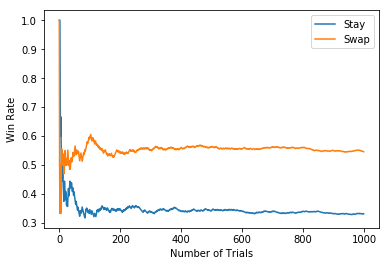

[1.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.4,
 0.3333333333333333,
 0.42857142857142855,
 0.5,
 0.5555555555555556,
 0.5,
 0.5454545454545454,
 0.5,
 0.5384615384615384,
 0.5,
 0.5333333333333333,
 0.5,
 0.47058823529411764,
 0.5,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5,
 0.52,
 0.5,
 0.5185185185185185,
 0.5357142857142857,
 0.5517241379310345,
 0.5333333333333333,
 0.5161290322580645,
 0.5,
 0.5151515151515151,
 0.5,
 0.4857142857142857,
 0.5,
 0.4864864864864865,
 0.5,
 0.5128205128205128,
 0.525,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5227272727272727,
 0.5333333333333333,
 0.5434782608695652,
 0.5319148936170213,
 0.5416666666666666,
 0.5306122448979592,
 0.54,
 0.5490196078431373,
 0.5576923076923077,
 0.5660377358490566,
 0.5555555555555556,
 0.5454545454545454,
 0.5357142857142857,
 0.543859649122807,
 0.5517241379310345,
 0.5423728813559322,
 0.55,
 0.5409836065573771,
 0.5483870967741935,
 0.5396825396825397,


In [52]:
stay()
switch()
plt.plot(stay_rate, label='Stay')
plt.plot(switch_rate, label ='Swap')
plt.xlabel('Number of Trials')
plt.ylabel('Win Rate')
plt.legend()
plt.show()
switch_rate

As we can see, the stay strategy has a win rate of ~35% (approximately 1/3) and the switch strategy has a winrate of about ~56% (approximately 2/3) so we conclude that always switching is the better strategy